## S : Seaborn

- 공식 사이트 : https://seaborn.pydata.org/

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df_p = penguins.copy()

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

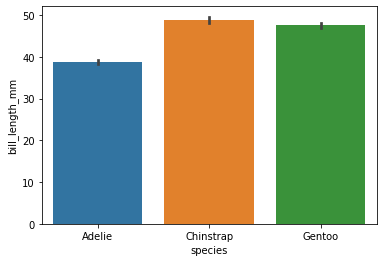

In [6]:
sns.barplot(
    x = penguins['species'],
    y = penguins['bill_length_mm']
)

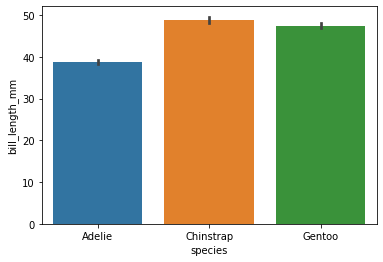

In [ ]:
sns.barplot(
    x = 'species', # 컬럼이나 인덱스의 이름만 적어줘도 가능
    y = 'bill_length_mm',
    data = penguins # 데이터프레임을 통째로 넣기
)

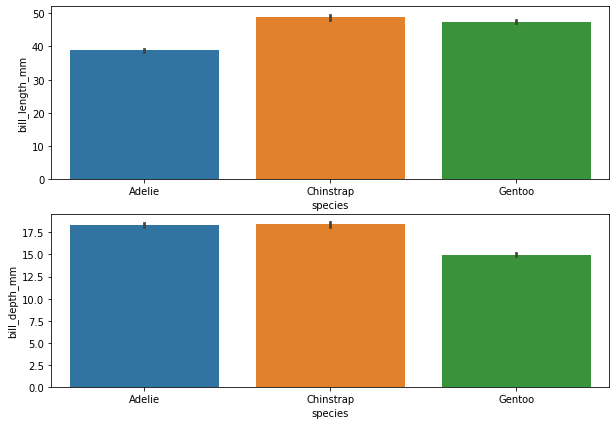

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10,7))

sns.barplot(
    x = 'species',
    y = 'bill_length_mm',
    data = penguins,
    ax=axes[0]
)

sns.barplot(
    x = 'species',
    y = 'bill_depth_mm',
    data = penguins,
    ax=axes[1]
)

plt.show() # seaborn이지만 plt.show() 인 것 확인

## Seaborn의 핵심 기능 - hue, facet

### 1. Hue

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

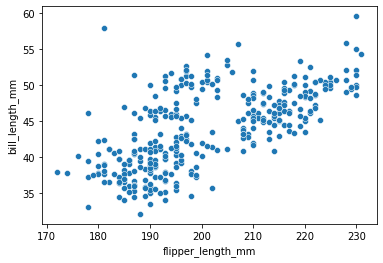

In [10]:
sns.scatterplot(x="flipper_length_mm", y="bill_length_mm", data=penguins)

In [11]:
# 펭귄 종류별 색상 구분
colors = {'Adelie' : 'blue', 'Chinstrap':'orange', 'Gentoo':'green'}

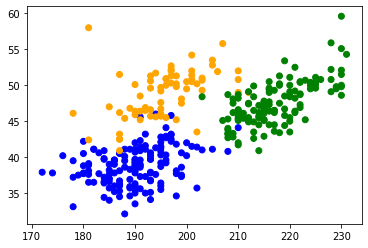

In [12]:
# matplotlib 
plt.scatter(df_p['flipper_length_mm'], df_p['bill_length_mm'], c = df_p['species'].map(colors))

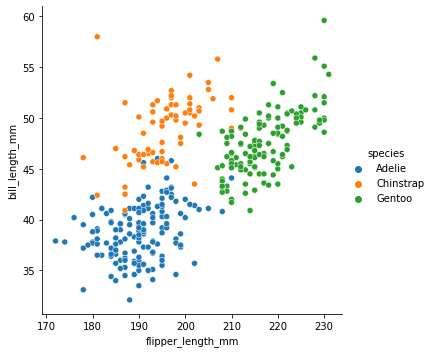

In [13]:
# seaborn 
sns.relplot(
            data=penguins, 
            x = "flipper_length_mm", 
            y = "bill_length_mm", 
            hue = "species" # hue! 
            )

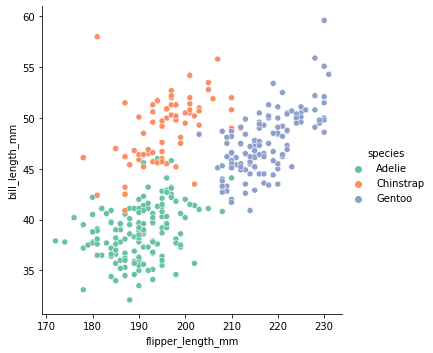

In [ ]:
# seaborn 
sns.relplot(
            data=penguins, 
            x="flipper_length_mm", 
            y="bill_length_mm", 
            hue="species", # hue!
            palette='Set2' # 색 바꾸기  
            )

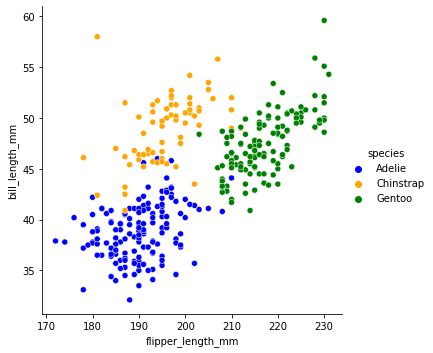

In [ ]:
# seaborn - 색 직접 지정하기 
sns.relplot(
            data=penguins, 
            x="flipper_length_mm", 
            y="bill_length_mm", 
            hue="species", # hue!
            palette=colors,
            )

### 2. Facet 

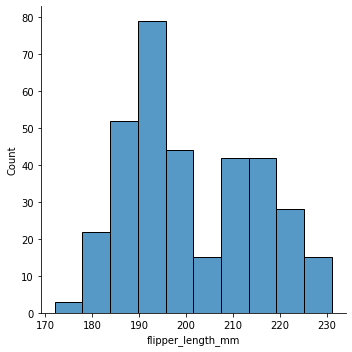

In [14]:
sns.displot(data=penguins, x="flipper_length_mm") # hist()

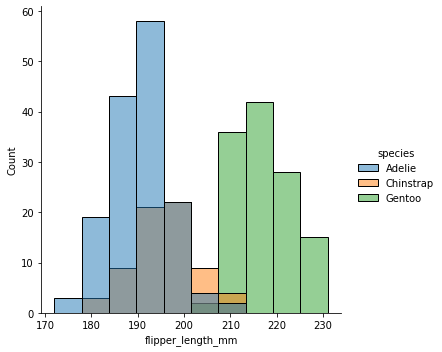

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species")

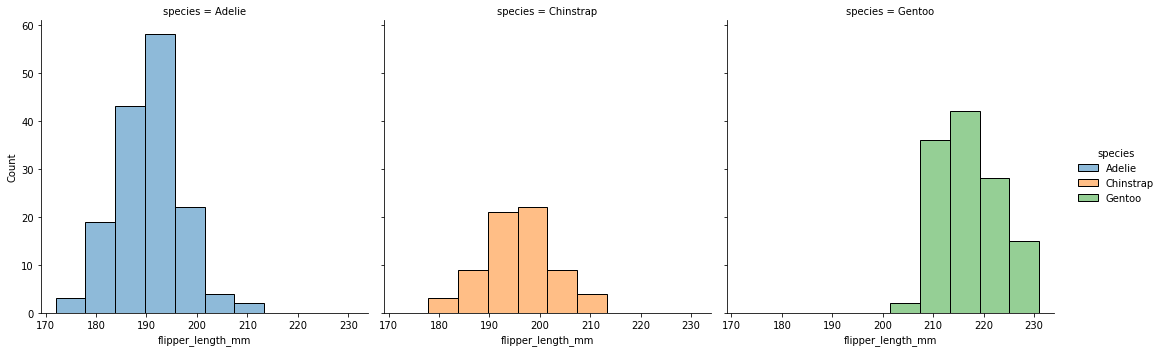

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col = "species")

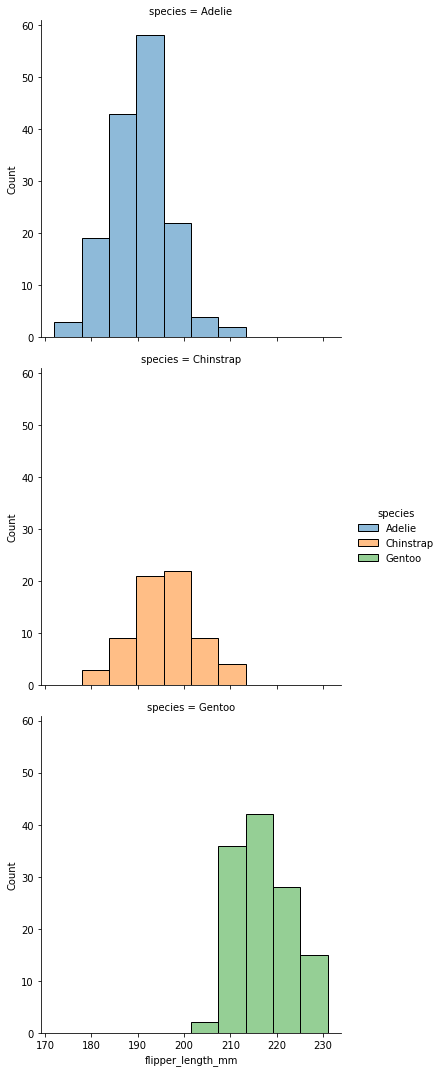

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", row = "species")

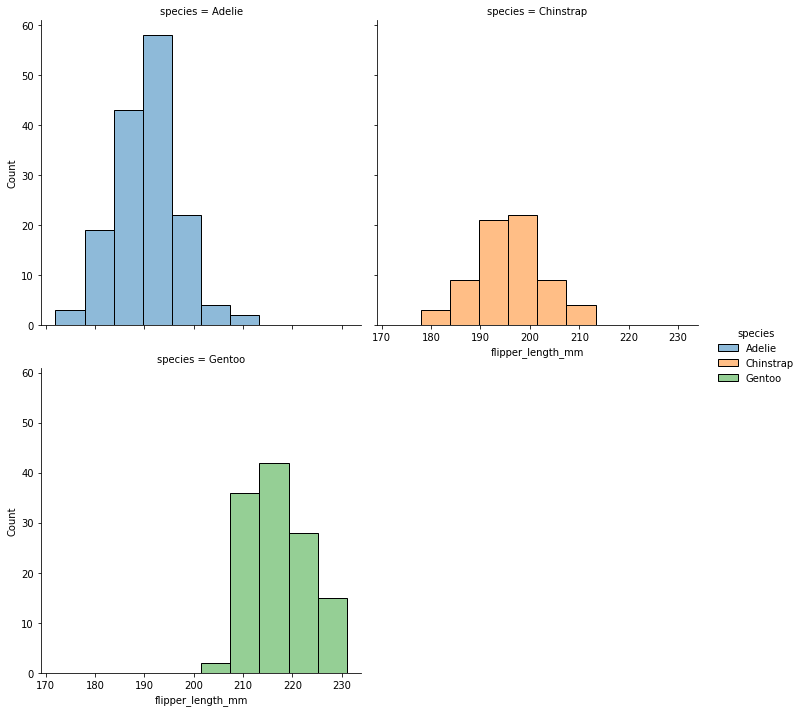

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col = "species", col_wrap = 2)

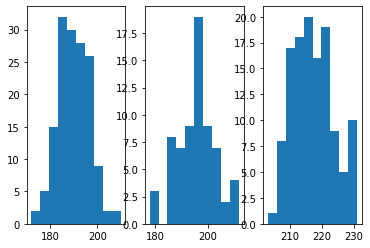

In [ ]:
# matplotlib 
fig, axes = plt.subplots(1, 3)

axes[0].hist(df_p[df_p['species']=='Adelie']['flipper_length_mm'])
axes[1].hist(df_p[df_p['species']=='Chinstrap']['flipper_length_mm'])
axes[2].hist(df_p[df_p['species']=='Gentoo']['flipper_length_mm'])

plt.show()

## Seaborn의 다양한 그래프 종류

<figure>
<img src="http://seaborn.pydata.org/_images/function_overview_8_0.png"></img>
</figure>

### relplot

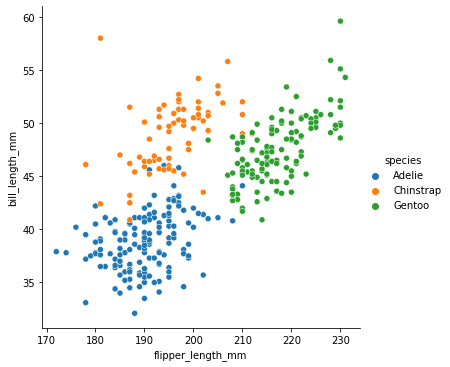

In [ ]:
# 대표 relplot
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

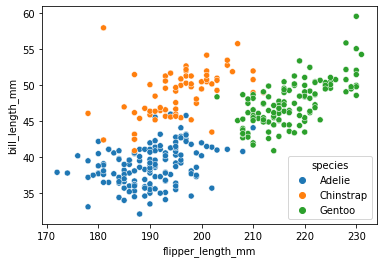

In [ ]:
# 산점도 명시 방법1 
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

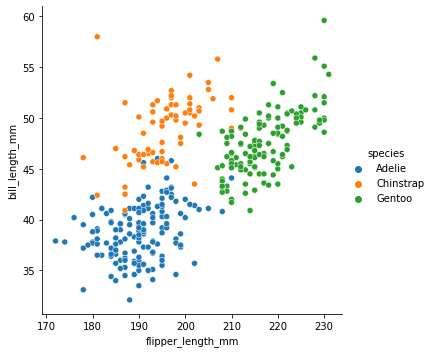

In [ ]:
# 산점도 명시 방법2
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue='species',kind='scatter')

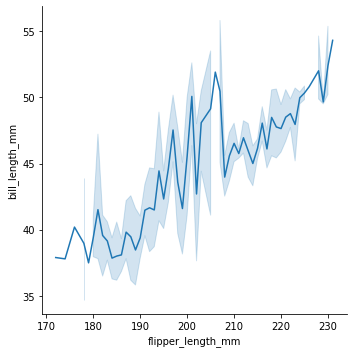

In [ ]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind='line')

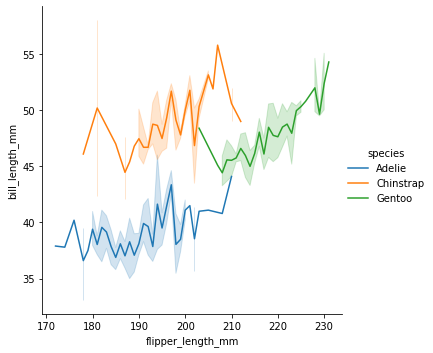

In [ ]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue='species',kind='line')

### displot

#### 히스토그램(default)

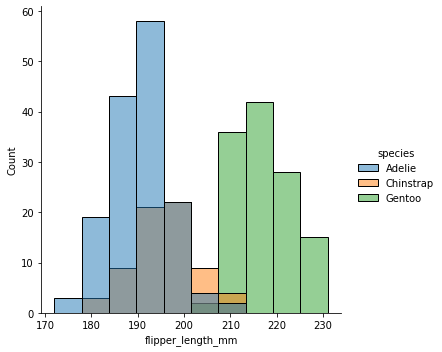

In [ ]:
# stack
sns.displot(data=penguins, x="flipper_length_mm", hue="species")

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species")

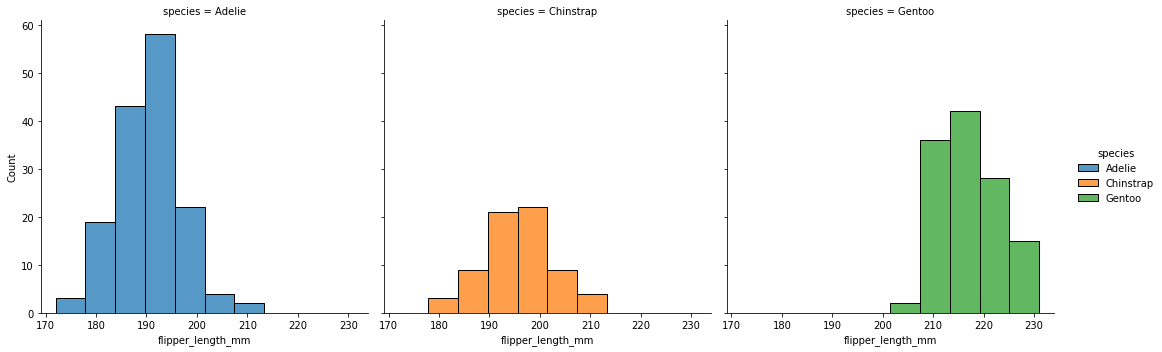

In [ ]:
# col species
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

#### 히스토그램

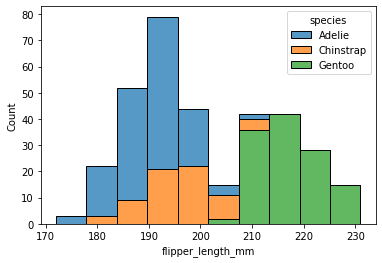

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#### kde : density

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

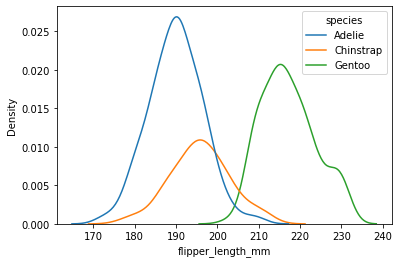

In [16]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

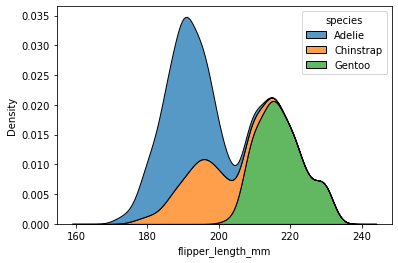

In [15]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#### kde

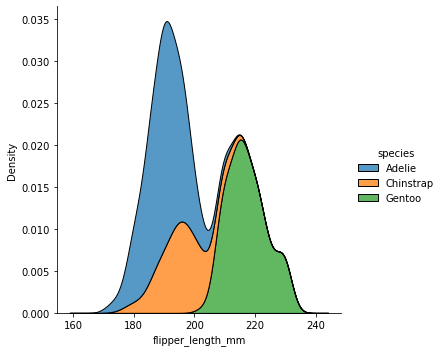

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

## catplot

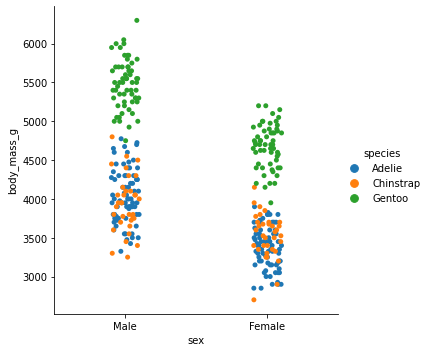

In [ ]:
sns.catplot(data=penguins, x="sex", y="body_mass_g", hue='species')

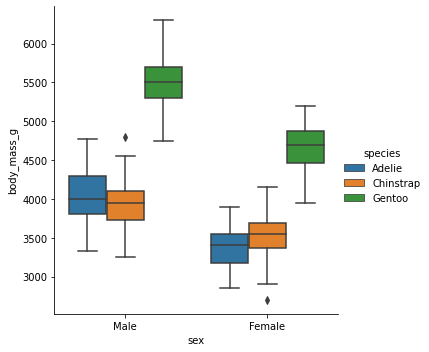

In [17]:
# catplot으로 boxplot 나타내기
sns.catplot(data=penguins, x="sex", y="body_mass_g", hue='species', kind='box')

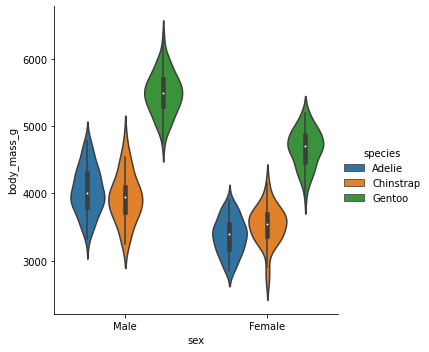

In [18]:
sns.catplot(data=penguins, x="sex", y="body_mass_g", hue='species', kind='violin')

#### strip

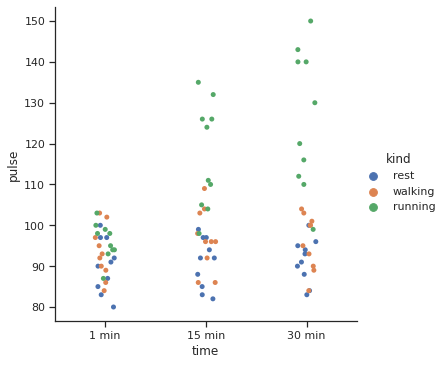

In [ ]:
exercise = sns.load_dataset("exercise")
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind='strip')

#### swarm

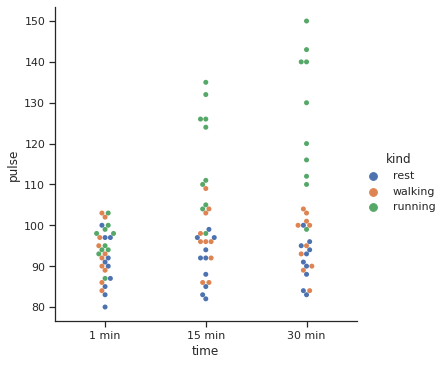

In [ ]:
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind='swarm')

#### box

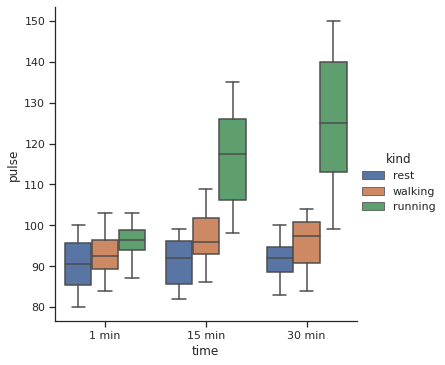

In [ ]:
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind='box')

#### violin

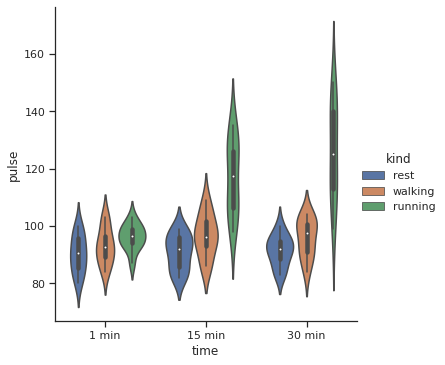

In [ ]:
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind='violin')

### jointplot.   
- scatter와 kde의 동시 출력 (default)

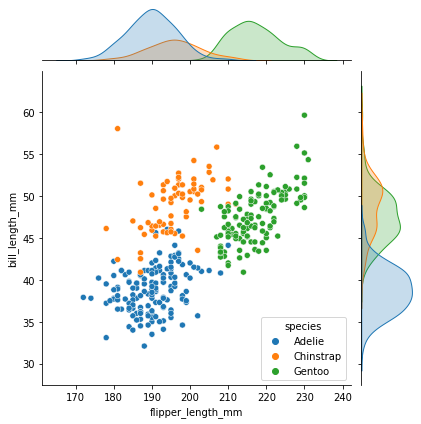

In [19]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

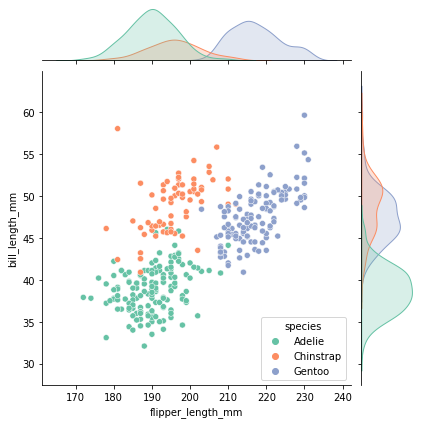

In [23]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", palette = 'Set2', hue="species")

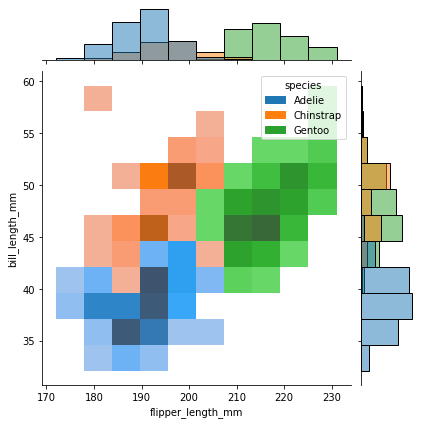

In [22]:
# heatmap과 hist plot으로 변경
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

### pairplot

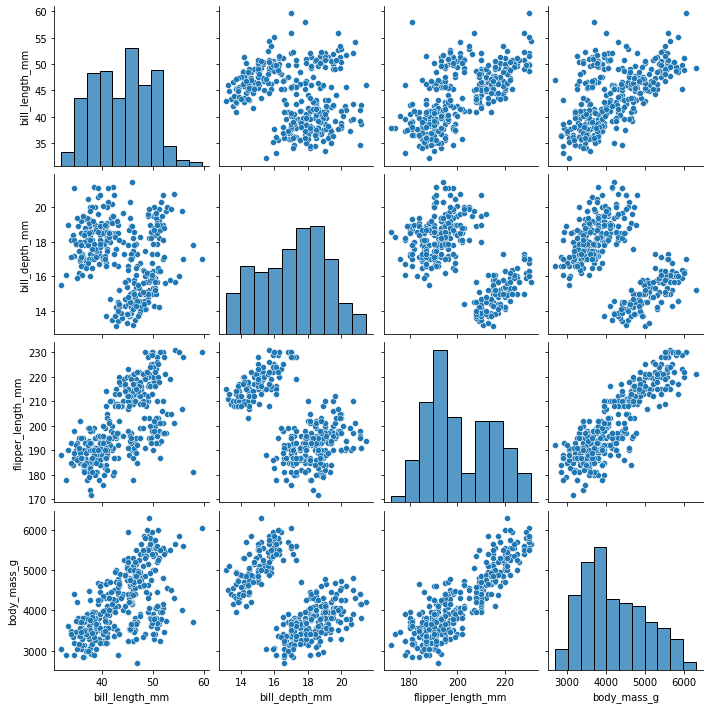

In [24]:
sns.pairplot(data=penguins)

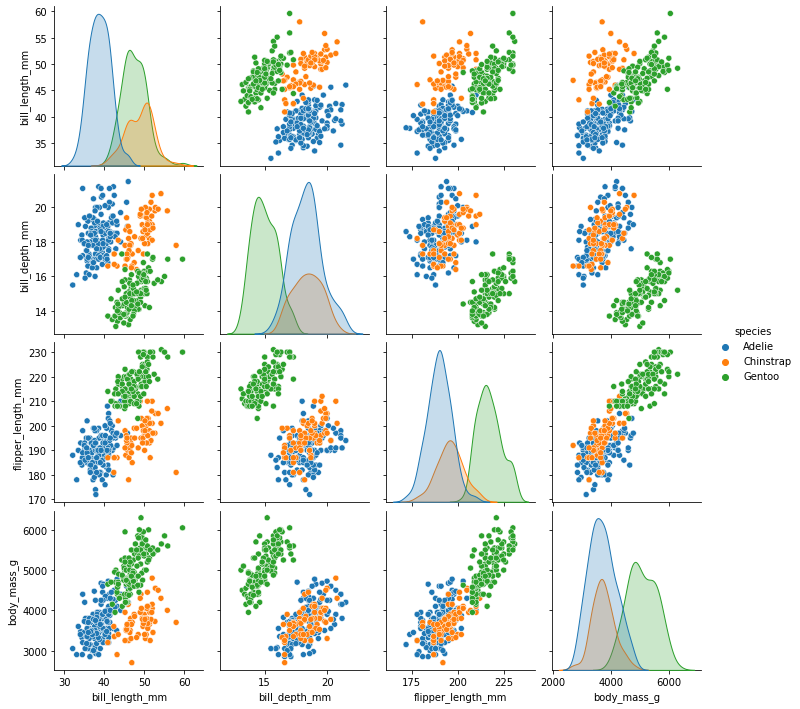

In [25]:
sns.pairplot(data=penguins, hue="species")